# 📕 **Overview**

## 📖 Background
Your best friend is an administrator at a large school. The school makes every student take year-end math, reading, and writing exams.

Since you have recently learned data manipulation and visualization, you suggest helping your friend analyze the score results. The school's principal wants to know if test preparation courses are helpful. She also wants to explore the effect of parental education level on test scores. 

## 💾 The data
The file has the following field [source](https://app.datacamp.com/workspace/w/2528f3a9-1114-4c92-a2ef-ecc7cb0fc98c#-the-data):
- "**gender**" - male / female
- "**race/ethnicity**" - one of 5 combinations of race/ethnicity
- "**parent_education_level**" - highest education level of either parent
- "**lunch**" - whether the student receives free/reduced or standard lunch
- "**test_prep_course**" - whether the student took the test preparation course
- "**math**" - exam score in math
- "**reading**" - exam score in reading
- "**writing**" - exam score in writing

## 💪 Challenge

Create a report to answer the principal's questions. Include:

- What are the average reading scores for students with/without the test preparation course?
- What are the average scores for the different parental education levels?
- Create plots to visualize findings for questions 1 and 2.
- _Optional_: Look at the effects within subgroups. Compare the average scores for students with/without the test preparation course for different parental education levels (e.g., faceted plots).
- _Optional_: The principal wants to know if kids who perform well on one subject also score well on the others. Look at the correlations between scores.
- Summarize your findings.

# 📗 **Exploratory Data Analysis**

In [2]:
# Importing packages
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np
from scipy.stats import iqr
plt.style.use("bmh")

In [3]:
# Reading in the data into a descriptive variable
exam_data = pd.read_csv('data/exams.csv')

#Changing "none" in test_prep_course to "not completed"
exam_data['test_prep_course'] = exam_data['test_prep_course'].map({"none":"not completed",
                                                                  "completed":"completed"})

# Take a look at the first five rows
exam_data.head(5)

,gender,race/ethnicity,parent_education_level,lunch,test_prep_course,math,reading,writing
0,female,group B,bachelor's degree,standard,not completed,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,not completed,90,95,93
3,male,group A,associate's degree,free/reduced,not completed,47,57,44
4,male,group C,some college,standard,not completed,76,78,75


In [4]:
#Renaming the headers:
exam_data = exam_data.rename(columns={"test_prep_course": "Test Preparation Course", 
                          "parent_education_level": "Parent Education Level",
                          "race/ethnicity":"Race/Ethnicity",
                          "gender":"Gender",
                          "math": "Math Exam Score",
                          "reading":"Reading Exam Score",
                          "writing":"Writing Exam Score",
                          "lunch": "Lunch"
                        })

#Checking the length and data type of each column, as well as whether or not there are any missing values.
exam_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Gender                   1000 non-null   object
 1   Race/Ethnicity           1000 non-null   object
 2   Parent Education Level   1000 non-null   object
 3   Lunch                    1000 non-null   object
 4   Test Preparation Course  1000 non-null   object
 5   Math Exam Score          1000 non-null   int64 
 6   Reading Exam Score       1000 non-null   int64 
 7   Writing Exam Score       1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


From the above table, it is possible to see that the dataset doesn't contain any missing values and the data types are assigned correctly. There are five categorical variables (gender, race/ethnicity, parent_education_level, lunch, and test_prep_course) and three numerical variables (math, reading, and writing).

## Analyzing categorical variables

An initial exploration of the categorical variables in the dataset can be achieved using descriptive statistics, summarized in the table below:

In [5]:
exam_data.describe(exclude = [np.number])

,Gender,Race/Ethnicity,Parent Education Level,Lunch,Test Preparation Course
count,1000,1000,1000,1000,1000
unique,2,5,6,2,2
top,female,group C,some college,standard,not completed
freq,518,319,226,645,642


At a first glance, gender, lunch, and test preparation course are variables with only two unique categories: these do not need to be visualized in a countplot in order to be analyzed. 
From the table we can conclude that the school's student population is well-balanced in terms of gender —the percentage of males is only 4 p.p higher than that of females— most students receive the standard lunch (approx. 65%), and a large proportion (64%) hasn't completed the test preparation course before the year-end examinations.

For the variables race/ethnicity and parent education level, we can tell that "group C" and "some college" are the most recurring categories, respectively. By visualizing them, however, we can see the frequency distribution of the other categories.

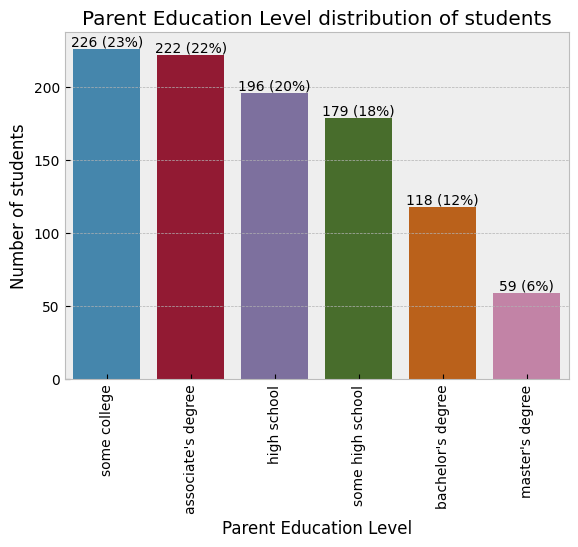

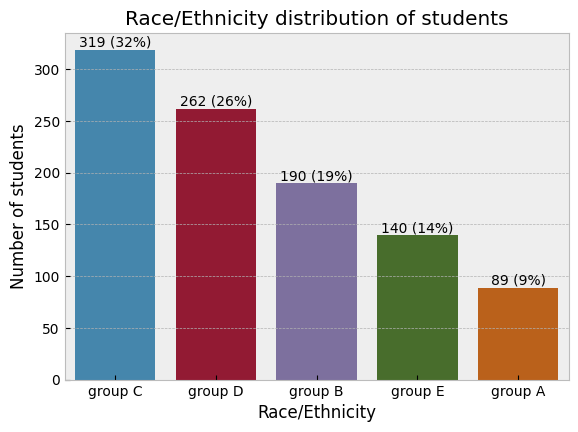

In [6]:
#Analysis of categorical variables
cat_vars = exam_data.select_dtypes("object")
cat_cols = cat_vars[["Parent Education Level", "Race/Ethnicity"]]
for col in cat_cols:
    plt.rcParams["figure.figsize"] = [6.50, 4.50]
    if col != "Parent Education Level":
        ax = sns.countplot(x = cat_vars[col], order=cat_vars[col].value_counts(ascending=False).index)
    else:
        ax = sns.countplot(x = cat_vars[col], order=cat_vars[col].value_counts(ascending=False).index)
        plt.xticks(rotation = 90)
    abs_values = cat_vars[col].value_counts(ascending=False).values
    rel_values = cat_vars[col].value_counts(ascending=False, normalize=True).values * 100
    labels = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]
    ax.bar_label(container=ax.containers[0], labels=labels)
    plt.title(f"{col} distribution of students")
    plt.ylabel("Number of students")
    plt.show()

We can make a number of observations using the countplots. A good 44% of students have parents who've either started college and haven't finished it, or have an associate's degree. There's an almost equally large percentage of students whose parents haven't finished high school, or have at least received their diploma (32%). Only 18% of students have parents who are highly educated, having achieved a bachelor's or a master's degree. In terms of race/ethnicity, a third of the students are part of group C.

## Analyzing numerical variables

In [7]:
#Summary statistics of the numeric variables
numeric_vars = exam_data.select_dtypes("int")
numeric_vars.describe().round()

,Math Exam Score,Reading Exam Score,Writing Exam Score
count,1000.0,1000.0,1000.0
mean,66.0,69.0,68.0
std,15.0,15.0,15.0
min,0.0,17.0,10.0
25%,57.0,59.0,58.0
50%,66.0,70.0,69.0
75%,77.0,79.0,79.0
max,100.0,100.0,100.0


The summary statistics table provides us with valuable information regarding how students performed in the year-end math, reading, and writing exams. 

All 1000 students completed their exams and although the distributions of the three subjects' exam scores aren't identical, they do present some similaraties: math has the lowest average exam score (66.09), reading the highest (69.17), and writing is in between (68.05), suggesting that, on average, the students performed slightly better in reading compared to the other two subjects. The standard deviation also differs between subjects: writing has the highest standard deviation (15.19), whilst math (15.16) and reading the lowest (14.6), an indication of greater variability in students' performance in the writing exam. 

Examining the percentiles, the 25th percentile and 75th percentile scores are relatively close across all three subjects: 25% of participants achieved an exam score of 58 and below, while 75% of 78 and below. The 50th percentile provides an indication of the skeweness of the data: the test scores of all three subjects follow a left-skewed distribution, with only a few students performing far below average. Given that this phenomenon is mild, there isn't a need to transform these variables. Finally, it isn't possible to determine from the summary statistics whether the data contains outliers; a more detailed analysis using box plots is required.

Nevertheless, assuming that the exam scores are classified according to the American grading scale (below) it can be said that the year-end exam performance of students at this school requires serious improvement (the mean and median grade across the board is a D), although further analysis is needed to determine the reason.

![American Grading Scale](American%20Grading%20Scale.png)

## Identifying outliers

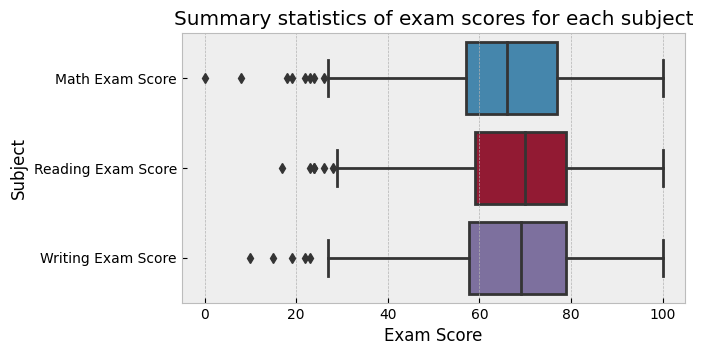

In [8]:
#Plotting a histogram for the three numeric variables to visualize the summary stats.
plt.rcParams["figure.figsize"] = [6.50, 3.50]
sns.boxplot(numeric_vars, orient = "h")
plt.ylabel("Subject")
plt.xlabel("Exam Score")
plt.title("Summary statistics of exam scores for each subject")
plt.show()

The box plots highlight the existence of outliers: across subjects, there are a few students that performed extremely poorly at the year-end examinations, with exam scores that are well below a "fail" grade. These students have been identified using the interquartile range, with their characteristics summarised in the table below:

In [9]:
#IQR math
iqr_math = iqr(exam_data["Math Exam Score"])
#Thresholds math
lt_math= np.quantile(exam_data["Math Exam Score"], 0.25) - 1.5 * iqr_math
ut_math= np.quantile(exam_data["Math Exam Score"], 0.75) + 1.5 * iqr_math
#IQR writing
iqr_writing = iqr(exam_data["Writing Exam Score"])
lt_writing= np.quantile(exam_data["Writing Exam Score"], 0.25) - 1.5 * iqr_writing
ut_writing= np.quantile(exam_data["Writing Exam Score"], 0.75) + 1.5 * iqr_writing
#IQR reading
iqr_reading = iqr(exam_data["Reading Exam Score"])
lt_reading= np.quantile(exam_data["Reading Exam Score"], 0.25) - 1.5 * iqr_reading
ut_reading= np.quantile(exam_data["Reading Exam Score"], 0.75) + 1.5 * iqr_reading
#Finding the outliers
outliers = exam_data[(exam_data["Math Exam Score"] < lt_math) | (exam_data["Math Exam Score"] > ut_math) | 
         (exam_data["Writing Exam Score"] < lt_writing) | (exam_data["Writing Exam Score"] > ut_writing) | 
         (exam_data["Reading Exam Score"] < lt_reading) | (exam_data["Reading Exam Score"] > ut_reading) ]

In [10]:
outliers.describe(exclude = [np.number])

,Gender,Race/Ethnicity,Parent Education Level,Lunch,Test Preparation Course
count,12,12,12,12,12
unique,2,5,4,2,2
top,female,group B,some high school,free/reduced,not completed
freq,8,6,4,10,11


There are 12 students that are outliers in the dataset, with certain characteristics serving as a fil rouge between them: most are female, receive a free/reduced lunch, and haven't completed the test preparation course. 

These outliers aren't eliminated as their occurence is plausible. Rather, they shine light on those students who are clearly struggling; additional analysis is recommended in order to determine the cause of such a poor exam performance and resolve it, so that these students are not penalised in the following exam cycle.

## Conclusions
These results give us an initial idea of what lies beyond the data: it can be assumed — but this would require confirmation — that the school is located in a lower-middle class area, with residents belonging primarily to a certain race/ethnicity. This can be deduced by the significant percentage of students who receive a free/reduced lunch (35%), have parents who either haven't pursued higher education, or if they have, have done so likely at a community college (83%), and the predominance of a race/ethnicity in the dataset (group C). 

# 📘 **Main Analysis**

Following the completion of the exploratory analysis, we can proceed to answering the questions.

## Average reading score for students with/without the test preparation course

In [11]:
"""I used group by to group the exam data by those who have completed/haven't completed the test preparation course , aggregating the exam reading scores by mean and counting the number of students who have or haven't completed the course."""
mean_reading_scores_course = exam_data.groupby("Test Preparation Course").agg({"Reading Exam Score":[("Average Reading Exam Score","mean"), ("Variability in Reading Exam Scores", "std")], "Test Preparation Course":[("Number of Students","count")]})

#Dropping the redundant column header generated.
mean_reading_scores_course.columns = mean_reading_scores_course.columns.droplevel()
#Resetting the index so that I can rename the test_prep_course column as well.
mean_reading_scores_course.reset_index(inplace=True)
mean_reading_scores_course["Average Reading Exam Score"] = round(mean_reading_scores_course["Average Reading Exam Score"])
mean_reading_scores_course.rename(columns = {'test_prep_course':'Test Preparation Course'}, inplace=True)

mean_reading_scores_course.head()

,Test Preparation Course,Average Reading Exam Score,Variability in Reading Exam Scores,Number of Students
0,completed,74.0,13.638384,358
1,not completed,67.0,14.463885,642


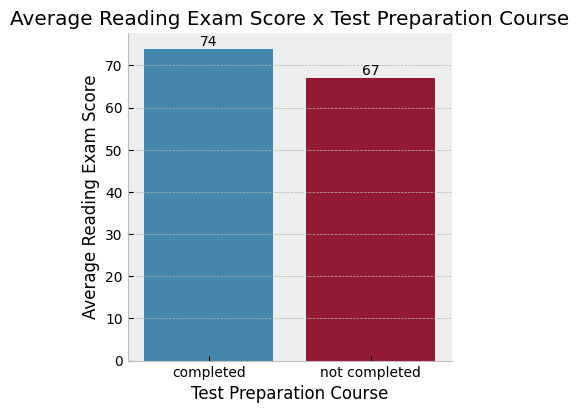

In [12]:
values = np.array(mean_reading_scores_course["Average Reading Exam Score"]) 
g = sns.catplot(x = "Test Preparation Course", y= "Average Reading Exam Score", data = mean_reading_scores_course, kind = "bar",height = 4)
ax = g.facet_axis(0, 0)
ax.bar_label(ax.containers[0])
g.set(title = "Average Reading Exam Score x Test Preparation Course")
plt.show()

On average, students who've completed the test preparation course have a higher reading exam score compared to those who haven't completed it. 

## Average exam scores for different parent education levels

In [13]:
""" I once again use group by to group the different exam scores by parental education level."""
scores_parental_edu = exam_data.groupby("Parent Education Level").agg({"Math Exam Score":[("Average Math Exam Score","mean")], "Reading Exam Score":[("Average Reading Exam Score","mean")], "Writing Exam Score":[("Average Writing Exam Score","mean")]})

scores_parental_edu.columns = scores_parental_edu.columns.droplevel()
scores_parental_edu.reset_index(inplace=True)
#Rounding the values in the exam score columns to the whole number.
scores_parental_edu["Average Math Exam Score"] = round(scores_parental_edu["Average Math Exam Score"])
scores_parental_edu["Average Reading Exam Score"] = round(scores_parental_edu["Average Reading Exam Score"])
scores_parental_edu["Average Writing Exam Score"] = round(scores_parental_edu["Average Writing Exam Score"])
#Creating a new column called "Average Exam Score" to see the average for each parent educaiton level.
scores_parental_edu["Average Exam Score"] = round((scores_parental_edu["Average Math Exam Score"] + 
                                              scores_parental_edu["Average Reading Exam Score"] + 
                                              scores_parental_edu["Average Writing Exam Score"])/3)
scores_parental_edu.head(10)

,Parent Education Level,Average Math Exam Score,Average Reading Exam Score,Average Writing Exam Score,Average Exam Score
0,associate's degree,68.0,71.0,70.0,70.0
1,bachelor's degree,69.0,73.0,73.0,72.0
2,high school,62.0,65.0,62.0,63.0
3,master's degree,70.0,75.0,76.0,74.0
4,some college,67.0,69.0,69.0,68.0
5,some high school,63.0,67.0,65.0,65.0


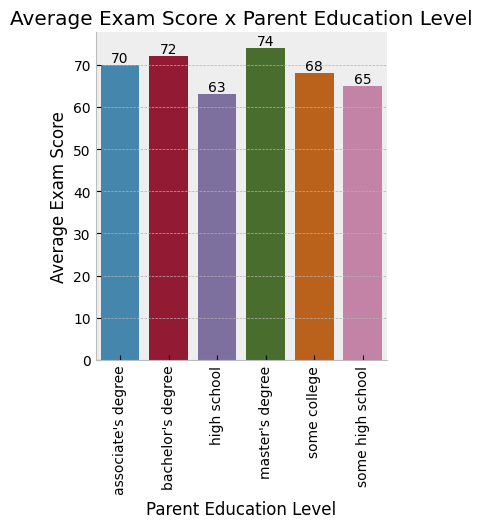

In [14]:
values = np.array(scores_parental_edu["Average Exam Score"]) 
h = sns.catplot(x = "Parent Education Level", y= "Average Exam Score", data = scores_parental_edu, kind = "bar", height = 4)
ax = h.facet_axis(0, 0)
plt.xticks(rotation = 90)
ax.bar_label(ax.containers[0]) 
h.set(title = "Average Exam Score x Parent Education Level")
plt.show()

As illustrated in the graph above, students whose parents have a master's degree are those who have the highest average exam score, whilst those whose parents have a high school diploma have the lowest average exam score.

## Average Exam Scores by Parent Education Level and Test Preparation Course

In [15]:
exam_data["Average Exam Score"] = round((exam_data["Math Exam Score"] + 
                                              exam_data["Reading Exam Score"] + 
                                              exam_data["Writing Exam Score"])/3)

exam_data.pivot_table(index = "Parent Education Level", columns = "Test Preparation Course", values = "Average Exam Score").round()

Test Preparation Course,completed,not completed
Parent Education Level,,
associate's degree,75.0,66.0
bachelor's degree,76.0,69.0
high school,67.0,62.0
master's degree,76.0,72.0
some college,75.0,65.0
some high school,69.0,62.0


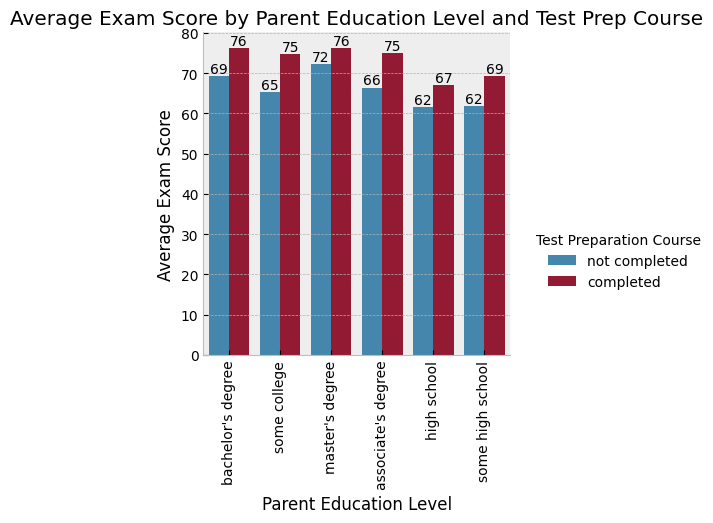

In [16]:
i = sns.catplot(x="Parent Education Level", y="Average Exam Score", data=exam_data,
            hue = "Test Preparation Course",kind="bar", height=4, errorbar = None)
ax = i.facet_axis(0, 0)
plt.xticks(rotation = 90)
for container in ax.containers:
    labels = [round(v.get_height()) for v in container]
    ax.bar_label(container, labels=labels, label_type='edge')
plt.title("Average Exam Score by Parent Education Level and Test Prep Course")
plt.show()

Regardless of students' parents' education, those who've complete the test preparation course prior to the exam have a higher average exam score.

## Correlation between exam scores of different subjects

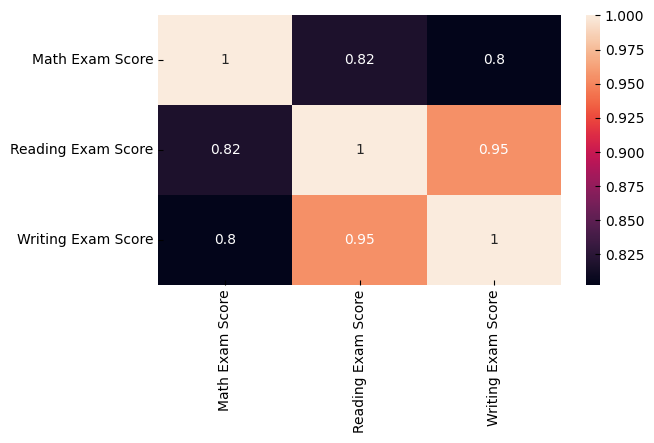

In [17]:
sns.heatmap(exam_data[["Math Exam Score", "Reading Exam Score", "Writing Exam Score"]].corr(), annot = True)
plt.show()

It appears, from the heatmap, that the exam scores of different subjects are correlated: reading exam scores have a very strong and positive correlation to writing exam scores (0.95) — as reading exam scores increase so do those for writing. Reading exam scores also have a strong positive correlation to math exam scores (0.82), as do writing exam scores (0.8). Via a pairplot, we can confirm whether the relationship between these variables is indeed linear.

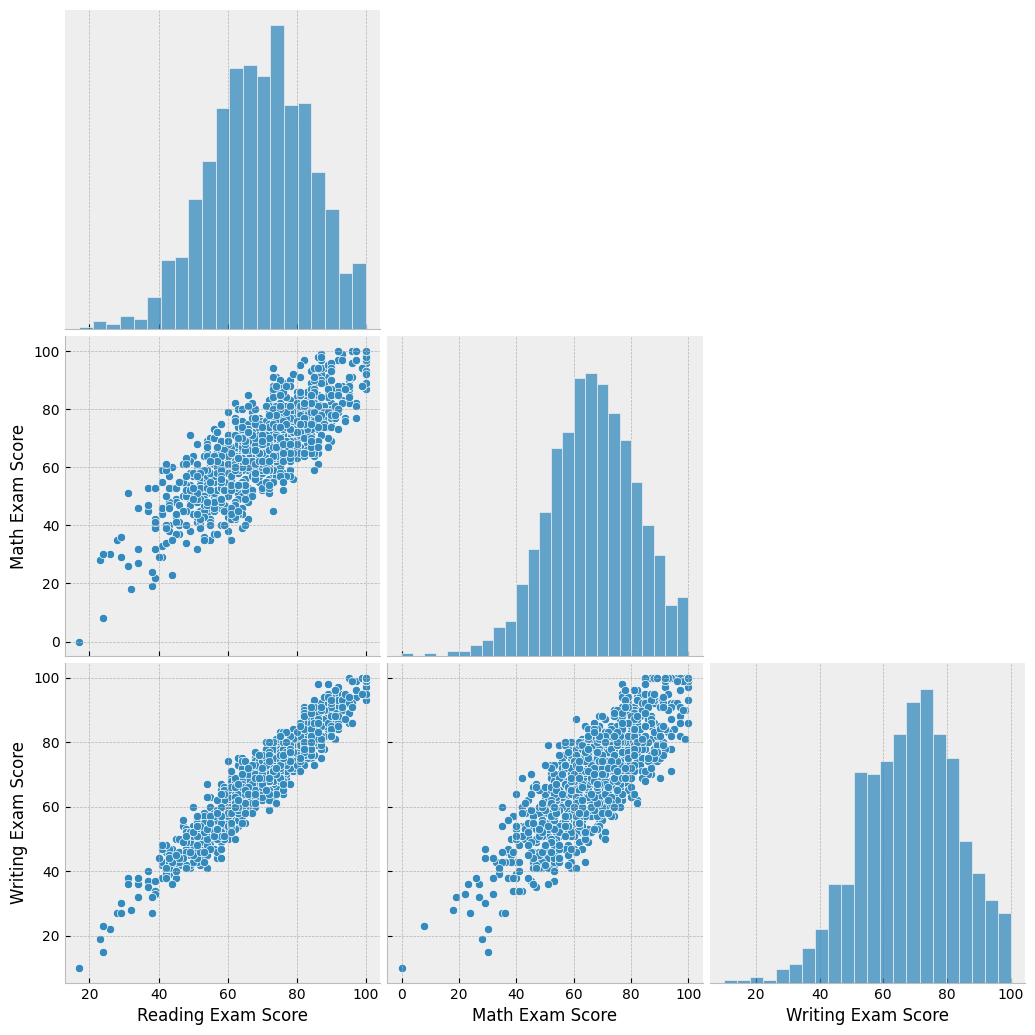

In [24]:
#Pairplot to see whether the correlation is effectively linear or not.
sns.pairplot(data = exam_data[["Reading Exam Score", "Math Exam Score", "Writing Exam Score"]], height =3.5, corner = True)
plt.show()

The pairplot confirms our initial interpretation of the correlation coefficients: exam scores of different subjects all have strong linear relationships with one another. 


# 📙 **Final Conclusions and Recommendations**

Test preparation courses are helpful in boosting students' final exam scores, regardless of their parents' education level. Students exam performance in one subject also translates to the others, albeit this doesn't indicate causality. Nevertheless, overall exam performance is subpar, with test preparation courses unable to raise the average school population score beyond a C-grade. Further analysis is required to determine the corrective steps required to resolve this.